In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_excel(r"F:\Python Practice\Data Science\Health Data Analysis\bmi_data.xlsx")

In [4]:
data_copy=data.copy()

In [5]:
data_copy

,Sex,Age,Height(Inches),Weight(Pounds),BMI
0,Female,21,65.78331,112.9925,18.357646
1,Female,35,71.51521,136.4873,18.762652
2,Female,27,69.39874,153.0269,22.338985
3,Male,24,68.21660,142.3354,21.504612
4,Female,18,67.78781,144.2971,22.077669
...,...,...,...,...,...
24995,Male,35,69.50215,118.0312,17.179051
24996,Male,26,64.54826,120.1932,20.281947
24997,Female,23,64.69855,118.2655,19.864050
24998,Male,20,67.52918,132.2682,20.392540


In [6]:
data_copy.isnull().sum()

Sex                0
Age                0
Height(Inches)    19
Weight(Pounds)    16
BMI               50
dtype: int64

In [9]:
mean_of_height=data_copy['Height(Inches)'].mean()
mean_of_weight=data_copy['Weight(Pounds)'].mean()
mean_of_BMI=data_copy['BMI'].mean()

In [10]:
mean_of_height

67.99296773387752

In [11]:
mean_of_weight

127.07820796989986

In [12]:
mean_of_BMI

19.321367876674504

In [20]:
data_copy['Height(Inches)'].fillna(mean_of_height,inplace=True)
data_copy['Weight(Pounds)'].fillna(mean_of_weight,inplace=True)
data_copy['BMI'].fillna(mean_of_BMI,inplace=True)

In [21]:
data_copy.isnull().sum()

Sex               0
Age               0
Height(Inches)    0
Weight(Pounds)    0
BMI               0
dtype: int64

In [38]:
data_copy['Weight in kg']=np.NaN

In [39]:
data.columns

Index(['Sex', 'Age', 'Height(Inches)', 'Weight(Pounds)', 'BMI'], dtype='object')

In [42]:
data_copy['Weight in kg']=data_copy['Weight(Pounds)']/2.205

In [40]:
data_copy.columns

Index(['Sex', 'Age', 'Height(Inches)', 'Weight(Pounds)', 'BMI',
       'Weight in kg'],
      dtype='object')

In [43]:
data_copy.head()

,Sex,Age,Height(Inches),Weight(Pounds),BMI,Weight in kg
0,Female,21,65.78331,112.9925,18.357646,51.243764
1,Female,35,71.51521,136.4873,18.762652,61.899002
2,Female,27,69.39874,153.0269,22.338985,69.399955
3,Male,24,68.21660,142.3354,21.504612,64.551202
4,Female,18,67.78781,144.2971,22.077669,65.440862


In [44]:
data_copy['index']=np.NaN

In [45]:
data_copy.head()

,Sex,Age,Height(Inches),Weight(Pounds),BMI,Weight in kg,index
0,Female,21,65.78331,112.9925,18.357646,51.243764,NaN
1,Female,35,71.51521,136.4873,18.762652,61.899002,NaN
2,Female,27,69.39874,153.0269,22.338985,69.399955,NaN
3,Male,24,68.21660,142.3354,21.504612,64.551202,NaN
4,Female,18,67.78781,144.2971,22.077669,65.440862,NaN


In [46]:
def indexing(kg):
    if kg<40.0:
        return "Under Weight"
    elif kg>=40 and kg<=60:
        return "Fit"
    elif kg>60 and kg<=80:
        return "Over Weight"
    elif kg>80:
        return "Obesity"
    

In [51]:
data_copy['index']=data_copy['Weight in kg'].apply(indexing)

In [53]:
def new_indexing(kg):
    if kg<40.0:
        return "0"
    elif kg>=40 and kg<=60:
        return "1"
    elif kg>60 and kg<=80:
        return "2"
    elif kg>80:
        return "3"

In [54]:
data_copy['new_index']=data_copy['Weight in kg'].apply(new_indexing)

In [55]:
data_copy.head()

,Sex,Age,Height(Inches),Weight(Pounds),BMI,Weight in kg,index,new_index
0,Female,21,65.78331,112.9925,18.357646,51.243764,Fit,1
1,Female,35,71.51521,136.4873,18.762652,61.899002,Over Weight,2
2,Female,27,69.39874,153.0269,22.338985,69.399955,Over Weight,2
3,Male,24,68.21660,142.3354,21.504612,64.551202,Over Weight,2
4,Female,18,67.78781,144.2971,22.077669,65.440862,Over Weight,2


In [57]:
data_copy['new_index'].value_counts()

1    16772
2     8211
0       17
Name: new_index, dtype: int64

In [58]:
data_copy['Sex'].value_counts()

Male      12590
Female    12410
Name: Sex, dtype: int64

In [59]:
data_copy['index'].value_counts()

Fit             16772
Over Weight      8211
Under Weight       17
Name: index, dtype: int64

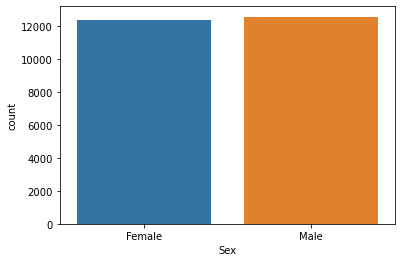

In [61]:
sns.countplot(data_copy['Sex'])

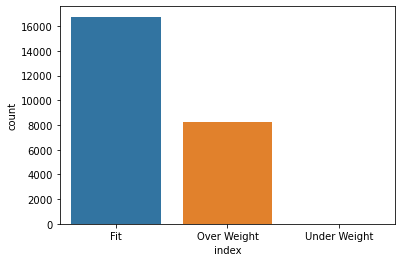

In [62]:
sns.countplot(data_copy['index'])

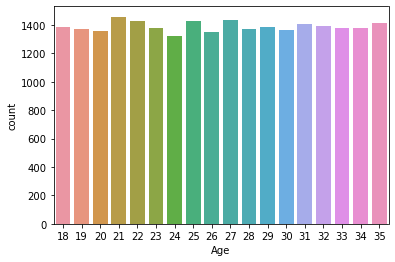

In [63]:
sns.countplot(data_copy['Age'])

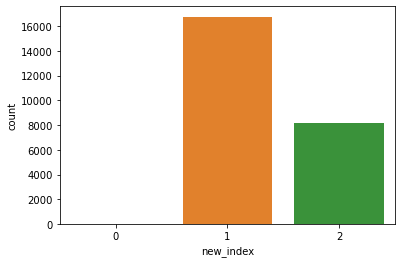

In [65]:
sns.countplot(data_copy['new_index'])

In [69]:
data_copy.head()

,Sex,Age,Height(Inches),Weight(Pounds),BMI,Weight in kg,index,new_index
0,Female,21,65.78331,112.9925,18.357646,51.243764,Fit,1
1,Female,35,71.51521,136.4873,18.762652,61.899002,Over Weight,2
2,Female,27,69.39874,153.0269,22.338985,69.399955,Over Weight,2
3,Male,24,68.21660,142.3354,21.504612,64.551202,Over Weight,2
4,Female,18,67.78781,144.2971,22.077669,65.440862,Over Weight,2


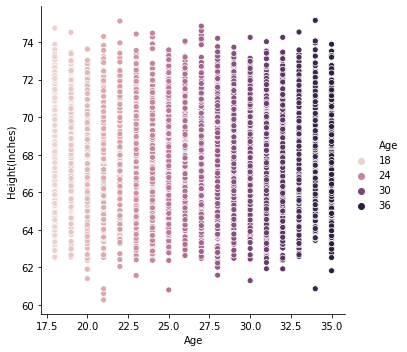

In [71]:
sns.relplot(y='Height(Inches)',x='Age',hue='Age',data=data_copy)

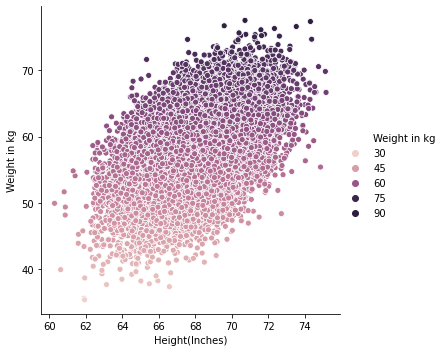

In [73]:
sns.relplot(x='Height(Inches)',y='Weight in kg',hue='Weight in kg',data=data_copy)

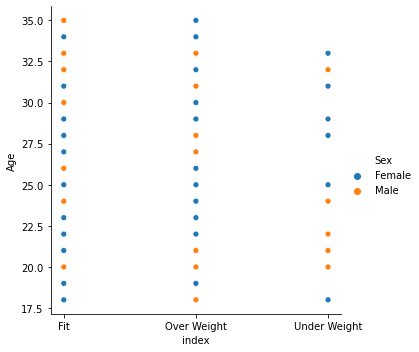

In [80]:
sns.relplot(x='index',y='Age',hue='Sex',data=data_copy)

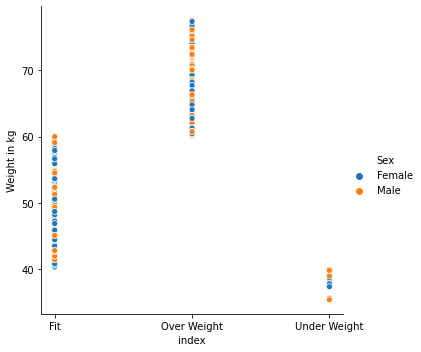

In [78]:
sns.relplot(x='index',y='Weight in kg',hue='Sex',data=data_copy)

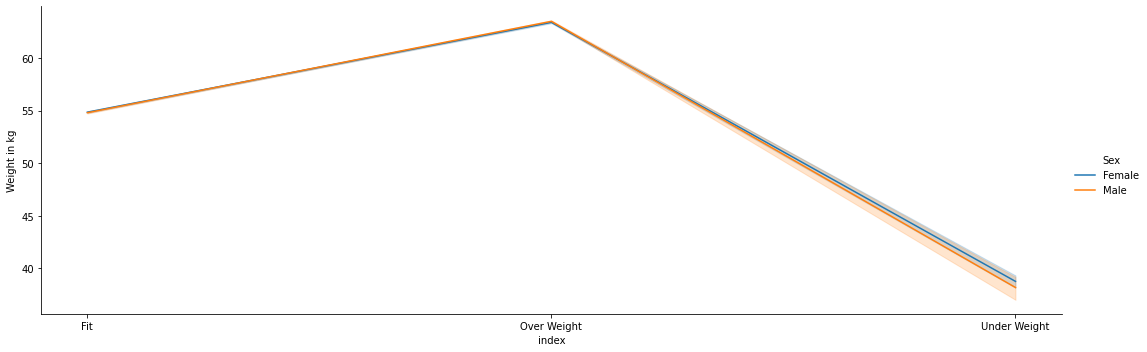

In [82]:
sns.relplot(x='index',y='Weight in kg',hue='Sex',kind='line',data=data_copy,height=5,aspect=3)

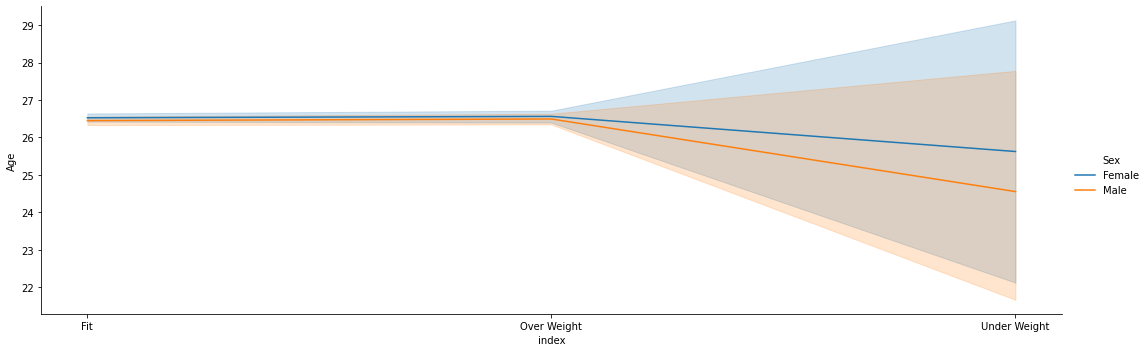

In [83]:
sns.relplot(x='index',y='Age',hue='Sex',data=data_copy,kind='line',height=5,aspect=3)

In [176]:
#z=data_copy.drop('index',axis=1)
x=data_copy.drop(['new_index','Sex','index','BMI','Weight(Pounds)'],axis=1)#training data
y=data_copy['index']#test data

In [177]:
x

,Age,Height(Inches),Weight in kg
0,21,65.78331,51.243764
1,35,71.51521,61.899002
2,27,69.39874,69.399955
3,24,68.21660,64.551202
4,18,67.78781,65.440862
...,...,...,...
24995,35,69.50215,53.528889
24996,26,64.54826,54.509388
24997,23,64.69855,53.635147
24998,20,67.52918,59.985578


In [178]:
y

0                Fit
1        Over Weight
2        Over Weight
3        Over Weight
4        Over Weight
            ...     
24995            Fit
24996            Fit
24997            Fit
24998            Fit
24999            Fit
Name: index, Length: 25000, dtype: object

In [179]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [180]:
x_train

,Age,Height(Inches),Weight in kg
10263,31,67.46994,55.265397
18409,24,66.50874,60.201814
13047,27,69.39596,59.813379
21371,23,66.45704,54.760000
16392,21,68.19583,66.334104
...,...,...,...
13123,31,67.75147,58.654376
19648,22,67.37382,53.533878
9845,33,63.93049,49.140998
10799,35,66.97528,60.678957


In [181]:
y_train

10263            Fit
18409    Over Weight
13047            Fit
21371            Fit
16392    Over Weight
            ...     
13123            Fit
19648            Fit
9845             Fit
10799    Over Weight
2732     Over Weight
Name: index, Length: 20000, dtype: object

In [182]:
x_test

,Age,Height(Inches),Weight in kg
14149,21,66.75233,60.863129
8946,26,70.23626,64.245669
22378,30,67.19022,50.623084
12162,24,67.09047,53.619819
4879,26,63.65356,46.531837
...,...,...,...
4022,32,68.49369,61.506984
17601,18,67.59295,68.290930
4718,32,67.51801,60.408345
9376,26,69.06944,72.543492


In [183]:
y_test

14149    Over Weight
8946     Over Weight
22378            Fit
12162            Fit
4879             Fit
            ...     
4022     Over Weight
17601    Over Weight
4718     Over Weight
9376     Over Weight
8019             Fit
Name: index, Length: 5000, dtype: object

In [184]:
s=StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.fit_transform(x_test)

# Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

to know more about StandardScaler() - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [185]:
clf=svm.SVC()
clf.fit(x_train,y_train)
predict=clf.predict(x_test)

# Support Vector Classification 

In machine learning, support-vector machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.

SVM is a supervised machine learning algorithm which can be used for classification or regression problems. It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.

A support vector machine is a machine learning model that is able to generalise between two different classes if the set of labelled data is provided in the training set to the algorithm. The main function of the SVM is to check for that hyperplane that is able to distinguish between the two classes.

To know more about SVC()- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report as shown below.

TN / True Negative: when a case was negative and predicted negative
TP / True Positive: when a case was positive and predicted positive
FN / False Negative: when a case was positive but predicted negative
FP / False Positive: when a case was negative but predicted positive

Precision – What percent of your predictions were correct?
Recall – What percent of the positive cases did you catch? 
F1 score – What percent of positive predictions were correct? 


To know more about Classification Report - https://muthu.co/understanding-the-classification-report-in-sklearn/#:~:text=A%20Classification%20report%20is%20used,classification%20report%20as%20shown%20below. 

In [187]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         Fit       1.00      1.00      1.00      3335
 Over Weight       0.99      1.00      1.00      1660
Under Weight       0.00      0.00      0.00         5

    accuracy                           1.00      5000
   macro avg       0.66      0.66      0.66      5000
weighted avg       1.00      1.00      1.00      5000



# Confusion Matrix
Confusion Matrix is a performance measurement for machine learning classification.

To know more about confusion matrix- https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

In [188]:
print(confusion_matrix(y_test,predict))

[[3324   11    0]
 [   3 1657    0]
 [   5    0    0]]


In [189]:
print(accuracy_score(y_test,predict))

0.9962


In [199]:
a=[[34,71,61]]
a=s.transform(a)
b=clf.predict(a)

In [200]:
b

array(['Over Weight'], dtype=object)

In [198]:
data_copy

,Sex,Age,Height(Inches),Weight(Pounds),BMI,Weight in kg,index,new_index
0,Female,21,65.78331,112.9925,18.357646,51.243764,Fit,1
1,Female,35,71.51521,136.4873,18.762652,61.899002,Over Weight,2
2,Female,27,69.39874,153.0269,22.338985,69.399955,Over Weight,2
3,Male,24,68.21660,142.3354,21.504612,64.551202,Over Weight,2
4,Female,18,67.78781,144.2971,22.077669,65.440862,Over Weight,2
...,...,...,...,...,...,...,...,...
24995,Male,35,69.50215,118.0312,17.179051,53.528889,Fit,1
24996,Male,26,64.54826,120.1932,20.281947,54.509388,Fit,1
24997,Female,23,64.69855,118.2655,19.864050,53.635147,Fit,1
24998,Male,20,67.52918,132.2682,20.392540,59.985578,Fit,1
